In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
from sklearn.utils import shuffle
import time

In [2]:
benign1=pd.read_csv("medbiot/bashlite_leg_fan.csv")
benign2=pd.read_csv("medbiot/bashlite_leg_light.csv")
benign3=pd.read_csv("medbiot/bashlite_leg_lock.csv")
benign4=pd.read_csv("medbiot/bashlite_leg_switch.csv")
benign5=pd.read_csv("medbiot/torii_leg_light.csv")
benign6=pd.read_csv("medbiot/torii_leg_fan.csv")
benign7=pd.read_csv("medbiot/torii_leg_lock.csv")
benign8=pd.read_csv("medbiot/torii_leg_raspberry1.csv")
benign9=pd.read_csv("medbiot/torii_leg_raspberry2.csv")
benign10=pd.read_csv("medbiot/torii_leg_switch.csv")
benign11=pd.read_csv("medbiot/mirai_leg_fan.csv")
benign12=pd.read_csv("medbiot/mirai_leg_light.csv")
benign13=pd.read_csv("medbiot/mirai_leg_lock.csv")
benign14=pd.read_csv("medbiot/mirai_leg_switch.csv")
mirai1=pd.read_csv("medbiot/mirai_mal_CC_fan.csv")
mirai2=pd.read_csv("medbiot/mirai_mal_CC_light.csv")
mirai3=pd.read_csv("medbiot/mirai_mal_CC_lock.csv")
mirai4=pd.read_csv("medbiot/mirai_mal_CC_switch.csv")
mirai5=pd.read_csv("medbiot/mirai_mal_spread_fan.csv")
mirai6=pd.read_csv("medbiot/mirai_mal_spread_light.csv")
mirai7=pd.read_csv("medbiot/mirai_mal_spread_lock.csv")
mirai8=pd.read_csv("medbiot/mirai_mal_spread_switch.csv")
bahslite1=pd.read_csv("medbiot/bashlite_mal_CC_fan.csv")
bahslite2=pd.read_csv("medbiot/bashlite_mal_CC_light.csv")
bahslite3=pd.read_csv("medbiot/bashlite_mal_CC_lock.csv")
bahslite4=pd.read_csv("medbiot/bashlite_mal_CC_switch.csv")
bahslite5=pd.read_csv("medbiot/bashlite_mal_spread_fan.csv")
bahslite6=pd.read_csv("medbiot/bashlite_mal_spread_light.csv")
bahslite7=pd.read_csv("medbiot/bashlite_mal_spread_lock.csv")
bahslite8=pd.read_csv("medbiot/bashlite_mal_spread_switch.csv")
tori1=pd.read_csv("medbiot/torii_mal_fan.csv")
tori2=pd.read_csv("medbiot/torii_mal_light.csv")
tori3=pd.read_csv("medbiot/torii_mal_lock.csv")
tori4=pd.read_csv("medbiot/torii_mal_raspberry1.csv")
tori5=pd.read_csv("medbiot/torii_mal_raspberry2.csv")
tori6=pd.read_csv("medbiot/torii_mal_switch.csv")

In [4]:
benign1['Out']='Benign'
benign2['Out']='Benign'
benign3['Out']='Benign'
benign4['Out']='Benign'
benign5['Out']='Benign'
benign6['Out']='Benign'
benign7['Out']='Benign'
benign8['Out']='Benign'
benign9['Out']='Benign'
benign10['Out']='Benign'
benign11['Out']='Benign'
benign12['Out']='Benign'
benign13['Out']='Benign'
benign14['Out']='Benign'
mirai1['Out']='Mirai'
mirai2['Out']='Mirai'
mirai3['Out']='Mirai'
mirai4['Out']='Mirai'
mirai5['Out']='Mirai'
mirai6['Out']='Mirai'
mirai7['Out']='Mirai'
mirai8['Out']='Mirai'
bahslite1['Out']='Bashlite'
bahslite2['Out']='Bashlite'
bahslite3['Out']='Bashlite'
bahslite4['Out']='Bashlite'
bahslite5['Out']='Bashlite'
bahslite6['Out']='Bashlite'
bahslite7['Out']='Bashlite'
bahslite8['Out']='Bashlite'
tori1['Out']='Torii'
tori2['Out']='Torii'
tori3['Out']='Torii'
tori4['Out']='Torii'
tori5['Out']='Torii'
tori6['Out']='Torii'

In [6]:
df=pd.concat([benign1,benign2,benign3,benign4,benign5,benign6,benign7,benign8,benign9,benign10,benign11,benign12,benign13,benign14,
              mirai1,mirai2,mirai3,mirai4,mirai5,mirai6,mirai7,mirai8,bahslite1,bahslite2,bahslite3,bahslite4,bahslite5,bahslite6,bahslite7,bahslite8,
             tori1,tori2,tori3,tori4,tori5,tori6],axis=0)
df=shuffle(df)
y=df['Out']
df=df.drop(['Out'],axis=1)
X=df.iloc[:,:115]
start = time.time()

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [8]:
# Applying T-SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
X = svd.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1494055, 3) (640310, 3) (1494055,) (640310,)


In [10]:
#Gridsearch
from sklearn.neighbors import KNeighborsClassifier
from evolutionary_search import EvolutionaryAlgorithmSearchCV
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
grid = EvolutionaryAlgorithmSearchCV(KNeighborsClassifier(), param_grid, verbose=1, cv=3)
print (grid.fit(x_train,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Types [1, 1] and maxint [29, 1] detected
--- Evolve in 60 possible combinations ---
gen	nevals	avg     	min     	max     	std       
0  	50    	0.987612	0.985294	0.989017	0.00103003
1  	36    	0.988451	0.985471	0.989017	0.000599709
2  	29    	0.988813	0.988082	0.989017	0.000218773
3  	33    	0.988951	0.987787	0.989017	0.000212097
4  	37    	0.988992	0.988094	0.989017	0.000128804
5  	25    	0.989012	0.988781	0.989017	3.30778e-05
6  	31    	0.988993	0.987832	0.989017	0.000165951
7  	35    	0.988998	0.988084	0.989017	0.000130624
8  	33    	0.98897 	0.987574	0.989017	0.000238329
9  	33    	0.988998	0.988084	0.989017	0.000130624
10 	33    	0.989017	0.989017	0.989017	1.11022e-16
Best individual is: {'n_neighbors': 6, 'weights': 'distance'}
with fitness: 0.9890171379233027
None


In [11]:
yp= grid.predict(x_train)
end = time.time()
print(end - start, "seconds")
print('Accuracy Score:')
print(accuracy_score(y_train,yp))

3015.636234521866 seconds
Accuracy Score:
0.9999879522507539


In [12]:
clr= confusion_matrix(y_train,yp)
clr

array([[547081,      0,      6,      0],
       [     0, 761336,      2,      0],
       [     3,      1, 140238,      2],
       [     4,      0,      0,  45382]], dtype=int64)

Confusion matrix, without normalization
[[547081      0      6      0]
 [     0 761336      2      0]
 [     3      1 140238      2]
 [     4      0      0  45382]]
Normalized confusion matrix
[[9.99989033e-01 0.00000000e+00 1.09671771e-05 0.00000000e+00]
 [0.00000000e+00 9.99997373e-01 2.62695413e-06 0.00000000e+00]
 [2.13912895e-05 7.13042982e-06 9.99957217e-01 1.42608596e-05]
 [8.81329044e-05 0.00000000e+00 0.00000000e+00 9.99911867e-01]]


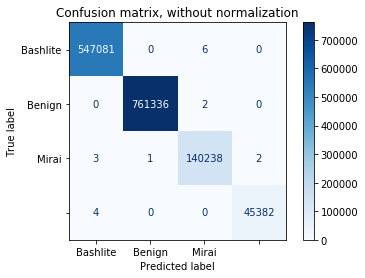

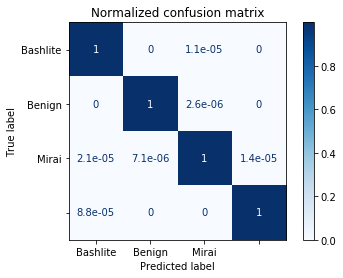

In [14]:
from sklearn.metrics import plot_confusion_matrix

classes=["Benign", "Bashlite", , "Mirai"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid, x_train, y_train,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [15]:
clrr = clr.astype('float') / clr.sum(axis=1)[:, np.newaxis]
clrr.diagonal()

array([0.99998903, 0.99999737, 0.99995722, 0.99991187])

In [16]:
acc_score= accuracy_score(y_train,yp)
acc_score

0.9999879522507539

In [17]:
Pr = precision_score(y_train, yp,  average="macro")
tpr = recall_score(y_train, yp,  average="macro")   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value

print("precision_score:", Pr)
print("recall:", tpr)

precision_score: 0.9999711951213598
recall: 0.9999638725963635


In [18]:
cm=confusion_matrix(y_train.ravel(), yp.ravel())
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

rec = tp / (tp + fn)
spe = tn / (tn + fp)
fal = fp / (fp + tn)
mis = fn / (fn + tp)


print("Calculating recall (also called the true positive rate or the sensitivity) for each class: ",rec)
print("Calculating specificity (also called the true negative rate) for each class: ",spe)
print("Calculating fall out (also called the false positive rate) for each class: ",fal)
print("Calculating miss rate (also called the false negative rate) for each class: ",mis)

Calculating recall (also called the true positive rate or the sensitivity) for each class:  1.0
Calculating specificity (also called the true negative rate) for each class:  1.0
Calculating fall out (also called the false positive rate) for each class:  0.0
Calculating miss rate (also called the false negative rate) for each class:  0.0


In [19]:
print(classification_report(y_train, yp))

              precision    recall  f1-score   support

    Bashlite       1.00      1.00      1.00    547087
      Benign       1.00      1.00      1.00    761338
       Mirai       1.00      1.00      1.00    140244
       Torii       1.00      1.00      1.00     45386

    accuracy                           1.00   1494055
   macro avg       1.00      1.00      1.00   1494055
weighted avg       1.00      1.00      1.00   1494055



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


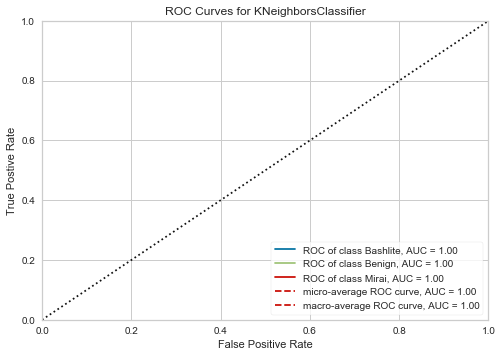

In [17]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=["Bashlite", "Benign", "Mirai"])

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()